In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

#variables
labels=()
axis=()
#Read the labels and case results
labels_df = pd.read_csv("NEISS_FMT.TXT", delimiter = "	")
data_df = pd.read_csv("NEISS.TXT", delimiter = "	")
body_df = pd.read_csv("body parts.csv")

In [2]:
#Displaying the hospitalization data
data_df = pd.read_csv("NEISS.TXT", delimiter = "	")
data_df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,...,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative_1,Stratum,PSU,Weight
0,200113309,01/01/2020,54,1,1,NaN,2,76,59,NaN,...,0,0,0,5022,0,0,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...,L,5,56.2517
1,200113888,01/04/2020,27,1,1,NaN,1,30,71,PAIN,...,0,0,0,5022,0,0,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...,V,40,15.9992
2,200114014,01/03/2020,48,2,1,NaN,2,37,53,NaN,...,0,0,0,5022,0,0,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...,V,61,15.9992
3,200116084,01/06/2020,25,1,1,NaN,2,32,57,NaN,...,0,0,0,5022,0,0,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...,L,69,56.2517
4,200120088,01/07/2020,55,1,0,NaN,0,31,71,PAIN,...,0,0,0,5022,0,0,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...,V,35,15.9992


In [3]:
#Cleaning data by case number to make sure no duplicates were included
data_df.groupby('CPSC_Case_Number').nunique().sum()

Treatment_Date       833
Age                  833
Sex                  833
Race                 833
Other_Race            14
Hispanic             833
Body_Part            833
Diagnosis            833
Other_Diagnosis      113
Body_Part_2          395
Diagnosis_2          395
Other_Diagnosis_2     74
Disposition          833
Location             833
Fire_Involvement     833
Alcohol              833
Drug                 833
Product_1            833
Product_2            833
Product_3            833
Narrative_1          833
Stratum              833
PSU                  833
Weight               833
dtype: int64

In [4]:
#Deleting cells that do not relate to injury types
data_df=data_df.drop(columns=['Product_1','Product_2','Product_3','Weight','PSU','Stratum','Other_Race','Hispanic'])

In [5]:
#REASON FOR ERROR: I already deleted the cells and ran the code again
data_df

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Alcohol,Drug,Narrative_1
0,200113309,01/01/2020,54,1,1,76,59,NaN,87.0,53.0,NaN,1,0,0,0,0,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...
1,200113888,01/04/2020,27,1,1,30,71,PAIN,NaN,NaN,NaN,1,0,0,0,0,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...
2,200114014,01/03/2020,48,2,1,37,53,NaN,30.0,53.0,NaN,1,5,0,0,0,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...
3,200116084,01/06/2020,25,1,1,32,57,NaN,79.0,71.0,LOW BACK PAIN,1,0,0,0,0,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...
4,200120088,01/07/2020,55,1,0,31,71,PAIN,NaN,NaN,NaN,1,0,0,0,0,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,210222778,12/28/2020,10,1,0,76,59,NaN,75.0,62.0,NaN,1,0,0,0,0,10YOM PRESENTS WITH HEAD LACERATION. PT WAS RI...
829,210225336,12/25/2020,10,1,1,32,57,NaN,80.0,57.0,NaN,4,0,0,0,0,10YOM PRESENTS WITH RIGHT ARM PAIN AFTER RUNNI...
830,210225342,12/25/2020,11,1,1,75,62,NaN,75.0,59.0,NaN,1,0,0,0,0,11YOM PRESENTS WITH SCALP LACERATION; PER PATI...
831,210245286,12/28/2020,25,2,0,75,52,NaN,75.0,59.0,NaN,1,4,0,0,0,25YOF PRESENTS AFTER BEING HIT BY A CAR WHILE ...


In [6]:
#REASON FOR ERROR: I already deleted the cells and ran the code again
#Leaving this cell avilable if I want to delete more columns in the future
data_df=data_df.drop(columns=['Sex','Race','Location','Fire_Involvement','Alcohol','Drug'])

In [7]:
#This section I am going to delete rows
labels_df = pd.read_csv("NEISS_FMT.TXT", delimiter = "	")
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1244,RACE,2,2,BLACK/AFRICAN AMERICAN
1245,RACE,3,3,OTHER
1246,RACE,4,4,ASIAN
1247,RACE,5,5,AMERICAN INDIAN/ALASKA NATIVE


In [8]:
# #Deleting row: AGELTTWO
indexNames = labels_df[(labels_df['Format name'] == 'AGELLTWO')].index 
labels_df.drop(indexNames , inplace=True) 

In [9]:
#Deleting row:RACE
indexNames = labels_df[(labels_df['Format name'] == 'RACE')].index 
labels_df.drop(indexNames , inplace=True) 

In [10]:
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [11]:
#Deleting row:FIRE
indexNames = labels_df[(labels_df['Format name'] == 'FIRE')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [12]:
#Deleting row:ALC_DRUG
indexNames = labels_df[(labels_df['Format name'] == 'ALC_DRUG')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [13]:
#Deleting row:LOC
indexNames = labels_df[(labels_df['Format name'] == 'LOC')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
1237,PROD,9002,9002,9002 - SEXUAL VIOLENCE
1238,PROD,9003,9003,9003 - NONSEXUAL INTIMATE PARTNER VIOLENCE
1239,PROD,9100,9100,9100 - OUT OF SCOPE PRODUCT - RETAILER REPORT
1240,PROD,9200,9200,9200 - DRYWALL CONTROL - NO COMPLAINT


In [14]:
#Deleting row:RACE
indexNames = labels_df[(labels_df['Format name'] == 'PROD')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
104,GENDER,2,2,FEMALE
105,HISP,.,.,NA before 2019
106,HISP,0,0,Unk/Not stated
107,HISP,1,1,Yes


In [15]:
##Deleting row:HISP
indexNames = labels_df[(labels_df['Format name'] == 'HISP')].index 
labels_df.drop(indexNames , inplace=True) 
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
95,DISP,8,8,"8 - FATALITY INCL. DOA, DIED IN ER"
96,DISP,9,9,"9 - UNKNOWN, NOT STATED"
102,GENDER,0,0,UNKNOWN
103,GENDER,1,1,MALE


In [16]:
#Double checking that these are the rows I need
labels_df

,Format name,Starting value for format,Ending value for format,Format value label
0,AGELTTWO,0,0,UNK
1,AGELTTWO,2,120,2 YEARS AND OLDER
2,AGELTTWO,201,201,1 MONTH
3,AGELTTWO,202,202,2 MONTHS
4,AGELTTWO,203,203,3 MONTHS
...,...,...,...,...
95,DISP,8,8,"8 - FATALITY INCL. DOA, DIED IN ER"
96,DISP,9,9,"9 - UNKNOWN, NOT STATED"
102,GENDER,0,0,UNKNOWN
103,GENDER,1,1,MALE


In [17]:
data_df

,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Narrative_1
0,200113309,01/01/2020,54,76,59,NaN,87.0,53.0,NaN,1,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...
1,200113888,01/04/2020,27,30,71,PAIN,NaN,NaN,NaN,1,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...
2,200114014,01/03/2020,48,37,53,NaN,30.0,53.0,NaN,1,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...
3,200116084,01/06/2020,25,32,57,NaN,79.0,71.0,LOW BACK PAIN,1,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...
4,200120088,01/07/2020,55,31,71,PAIN,NaN,NaN,NaN,1,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...
...,...,...,...,...,...,...,...,...,...,...,...
828,210222778,12/28/2020,10,76,59,NaN,75.0,62.0,NaN,1,10YOM PRESENTS WITH HEAD LACERATION. PT WAS RI...
829,210225336,12/25/2020,10,32,57,NaN,80.0,57.0,NaN,4,10YOM PRESENTS WITH RIGHT ARM PAIN AFTER RUNNI...
830,210225342,12/25/2020,11,75,62,NaN,75.0,59.0,NaN,1,11YOM PRESENTS WITH SCALP LACERATION; PER PATI...
831,210245286,12/28/2020,25,75,52,NaN,75.0,59.0,NaN,1,25YOF PRESENTS AFTER BEING HIT BY A CAR WHILE ...


In [18]:
# #HOSPITALIZED
disp_df = labels_df[labels_df['Format name'] == 'DISP']
disp_df

,Format name,Starting value for format,Ending value for format,Format value label
89,DISP,0,0,0 - NO INJURY
90,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
91,DISP,2,2,2 - TREATED AND TRANSFERRED
92,DISP,4,4,4 - TREATED AND ADMITTED/HOSPITALIZED
93,DISP,5,5,5 - HELD FOR OBSERVATION
94,DISP,6,6,6 - LEFT WITHOUT BEING SEEN
95,DISP,8,8,"8 - FATALITY INCL. DOA, DIED IN ER"
96,DISP,9,9,"9 - UNKNOWN, NOT STATED"


In [19]:
disp_df['Starting value for format'] = pd.to_numeric(disp_df['Starting value for format'])
disp_df.info()
combined_df = data_df.merge(disp_df, how='inner', left_on='Disposition', right_on='Starting value for format')
combined_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 89 to 96
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Format name                8 non-null      object
 1   Starting value for format  8 non-null      int64 
 2   Ending value for format    8 non-null      object
 3   Format value label         8 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


<ipython-input-19-a6ee7428005d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disp_df['Starting value for format'] = pd.to_numeric(disp_df['Starting value for format'])


,CPSC_Case_Number,Treatment_Date,Age,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Narrative_1,Format name,Starting value for format,Ending value for format,Format value label
0,200113309,01/01/2020,54,76,59,NaN,87.0,53.0,NaN,1,54 YOM FELL FROM A MOTORIZED SCOOTER ONTO PAVE...,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
1,200113888,01/04/2020,27,30,71,PAIN,NaN,NaN,NaN,1,27YOM C/O PAIN AND INJURY TO L SHOULDER. PT RE...,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
2,200114014,01/03/2020,48,37,53,NaN,30.0,53.0,NaN,1,48 YOF RIDING MOTORIZED SCOOTER ON UNEVEN GROU...,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
3,200116084,01/06/2020,25,32,57,NaN,79.0,71.0,LOW BACK PAIN,1,25 YOM NO HELMET WRECKED HIS ELECTRIC SCOOTER ...,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
4,200120088,01/07/2020,55,31,71,PAIN,NaN,NaN,NaN,1,55 YOM PRESENTS WITH RIB PAIN AFTER BEING STRU...,DISP,1,1,1 - TREATED/EXAMINED AND RELEASED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,201055174,10/21/2020,52,75,62,NaN,82.0,71.0,PAIN,6,52YOF WAS RIDING AN ELECTRIC SCOOTER DOWNTOWN ...,DISP,6,6,6 - LEFT WITHOUT BEING SEEN
829,201133188,11/12/2020,37,33,71,PAIN,NaN,NaN,NaN,6,^37YOM PT WAS ON A MOTOR SCOOTER GOING 10-15MP...,DISP,6,6,6 - LEFT WITHOUT BEING SEEN
830,201208360,11/27/2020,37,75,62,NaN,NaN,NaN,NaN,6,37 YOF REPORTS HAVING HAD ABOUT ONE ENTIRE BOT...,DISP,6,6,6 - LEFT WITHOUT BEING SEEN
831,200427295,04/06/2020,59,75,62,NaN,85.0,68.0,NaN,5,59YOF FALL OUT MOTORIZED WHEELCHAIR SCOOTER W/...,DISP,5,5,5 - HELD FOR OBSERVATION


In [20]:
#ADDING DEPENDENCIES
%matplotlib notebook

In [21]:
#Labeled injuries from label _df that I merged onto data_df for results
treatment = combined_df.groupby('Format value label')

#counting Case number ID for group
count_ppl = treatment['Format value label'].count()
count_ppl

Format value label
1 - TREATED/EXAMINED AND RELEASED        672
2 - TREATED AND TRANSFERRED               14
4 - TREATED AND ADMITTED/HOSPITALIZED    115
5 - HELD FOR OBSERVATION                   2
6 - LEFT WITHOUT BEING SEEN               30
Name: Format value label, dtype: int64

In [22]:
#ADDING DEPENDENCIES
%matplotlib notebook

In [23]:
# #Labeled injuries from label _df that I merged onto data_df for results
hospitalized = combined_df.groupby('Format value label')

#counting Case number ID for group
count_ppl = hospitalized['Format value label'].count()
count_ppl

Format value label
1 - TREATED/EXAMINED AND RELEASED        672
2 - TREATED AND TRANSFERRED               14
4 - TREATED AND ADMITTED/HOSPITALIZED    115
5 - HELD FOR OBSERVATION                   2
6 - LEFT WITHOUT BEING SEEN               30
Name: Format value label, dtype: int64

<IPython.core.display.Javascript object>


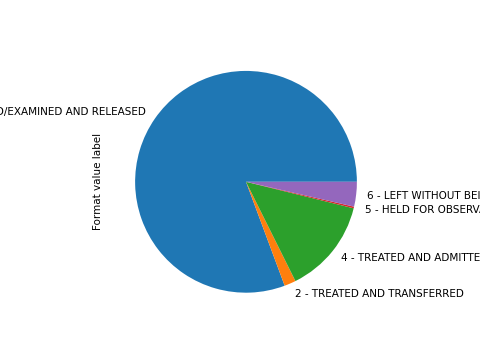

In [25]:
# Create a bar chart based off of the group series from before
treatment_count = count_ppl.plot(kind='pie')

# Set the xlabel and ylabel using class methods
# treatment_count.set_xlabel("Result of Injury")
# treatment_count.set_ylabel("Number of Treatments")


plt.show()
